### Ex1

In [1]:
install.packages('psych')
install.packages('tidyverse')
install.packages('corrplot')
install.packages('ggplot2')
install.packages('caret')
install.packages('Metrics')
install.packages('e1071')
install.packages('glmnet')

library(psych)          # alternative package to describe your data
library(tidyverse)      # easy way to subset your data
library(corrplot)       # to draw correlation plots
library(ggplot2)        # to plot graphs
library(caret)          # to run machine learning models
library(Metrics)        # to calculate RMSE
library(e1071)          # for statistical analyses
library(glmnet)         # for statistical analyses

options(scipen=999) # turn off scientific notation

Installing package into 'C:/Users/Max/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Max\AppData\Local\Temp\RtmpwnRL6W\downloaded_packages


Installing package into 'C:/Users/Max/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Max\AppData\Local\Temp\RtmpwnRL6W\downloaded_packages


Installing package into 'C:/Users/Max/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Max\AppData\Local\Temp\RtmpwnRL6W\downloaded_packages


Installing package into 'C:/Users/Max/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Max\AppData\Local\Temp\RtmpwnRL6W\downloaded_packages


Installing package into 'C:/Users/Max/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Max\AppData\Local\Temp\RtmpwnRL6W\downloaded_packages


Installing package into 'C:/Users/Max/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'Metrics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Max\AppData\Local\Temp\RtmpwnRL6W\downloaded_packages


Installing package into 'C:/Users/Max/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Max\AppData\Local\Temp\RtmpwnRL6W\downloaded_packages


Installing package into 'C:/Users/Max/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'glmnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Max\AppData\Local\Temp\RtmpwnRL6W\downloaded_packages


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()   masks psych::%+%()
✖ ggplot2::alpha() masks psych::alpha()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.95 loaded

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift



Attaching package: 'Metrics'


The following objects are masked from 'package:caret':

    precision, recall


Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand,

In [2]:
# declare the dataframe and load the data
df = read.csv('diabetes.csv')

In [3]:
# check the structure of the data
str(df)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [4]:
# set 'Outcome' as a factor variable
df$Outcome <- as.factor(df$Outcome)
table(df$Outcome)


  0   1 
500 268 

In [5]:
# explore missing values
sapply(df, function(x) sum(is.na(x))) 

Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0

In [6]:
# describe numeric and integer variables
df %>%
  keep(is.numeric) %>% 
  describe

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Pregnancies,1,768,3.8450521,3.3695781,3.0000,3.4610390,2.9652000,0.000,17.00,17.000,0.8981549,0.1421840,0.12158918
Glucose,2,768,120.8945312,31.9726182,117.0000,119.3798701,29.6520000,0.000,199.00,199.000,0.1730754,0.6193695,1.15371248
BloodPressure,3,768,69.1054688,19.3558072,72.0000,71.3571429,11.8608000,0.000,122.00,122.000,-1.8364126,5.1175100,0.69844253
SkinThickness,4,768,20.5364583,15.9522176,23.0000,19.9366883,17.7912000,0.000,99.00,99.000,0.1089456,-0.5309369,0.57562607
Insulin,5,768,79.7994792,115.2440024,30.5000,56.7451299,45.2193000,0.000,846.00,846.000,2.2633826,7.1331349,4.15850974
BMI,6,768,31.9925781,7.8841603,32.0000,31.9592532,6.8199600,0.000,67.10,67.100,-0.4273073,3.2449627,0.28449513
DiabetesPedigreeFunction,7,768,0.4718763,0.3313286,0.3725,0.4215536,0.2483355,0.078,2.42,2.342,1.9124179,5.5285389,0.01195579
Age,8,768,33.2408854,11.7602315,29.0000,31.5438312,10.3782000,21.000,81.00,60.000,1.1251880,0.6217269,0.42436080


### Ex2

In [7]:
# describe X-variables separately for both outcome categories:
describeBy(df, group=df$Outcome)


 Descriptive statistics by group 
group: 0
                         vars   n   mean    sd median trimmed   mad   min
Pregnancies                 1 500   3.30  3.02   2.00    2.89  2.97  0.00
Glucose                     2 500 109.98 26.14 107.00  108.87 23.72  0.00
BloodPressure               3 500  68.18 18.06  70.00   69.97 11.86  0.00
SkinThickness               4 500  19.66 14.89  21.00   19.08 16.31  0.00
Insulin                     5 500  68.79 98.87  39.00   49.19 57.82  0.00
BMI                         6 500  30.30  7.69  30.05   30.37  7.19  0.00
DiabetesPedigreeFunction    7 500   0.43  0.30   0.34    0.38  0.22  0.08
Age                         8 500  31.19 11.67  27.00   28.99  7.41 21.00
Outcome                     9 500   1.00  0.00   1.00    1.00  0.00  1.00
                            max  range  skew kurtosis   se
Pregnancies               13.00  13.00  1.11     0.65 0.13
Glucose                  197.00 197.00  0.17     1.85 1.17
BloodPressure            122.00 122.00 

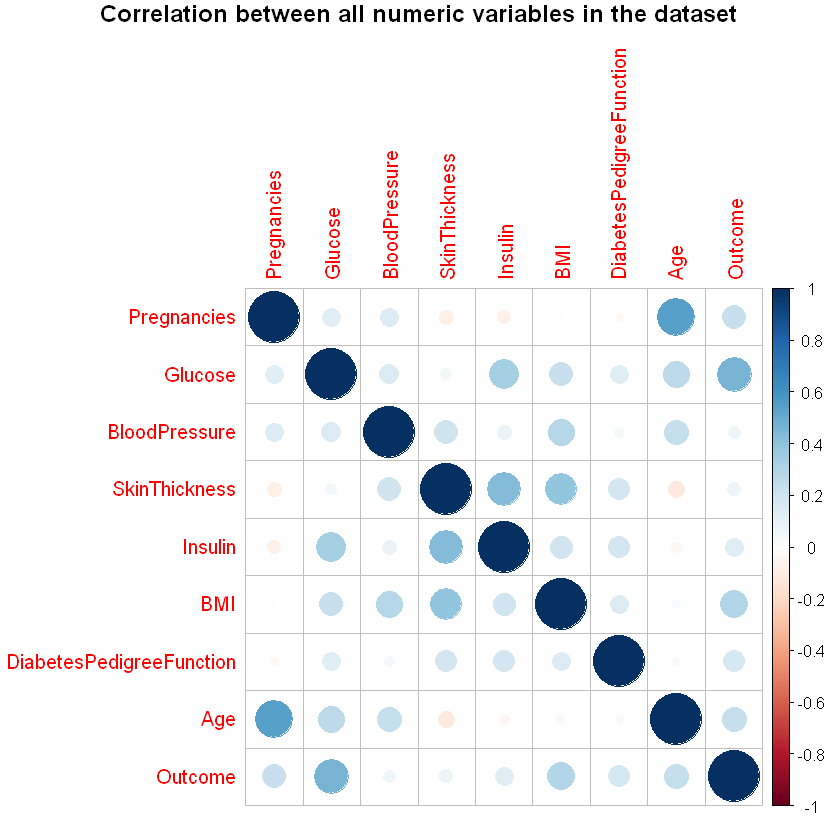

In [8]:
# correlation plot 
df$Outcome = as.numeric(df$Outcome)
corr_df <- df %>% 
  keep(is.numeric) %>% 
  cor

corrplot(corr_df, number.font=12, tl.cex = 1.00, title="Correlation between all numeric variables in the dataset", mar=c(0,0,1,0))
df$Outcome = as.factor(df$Outcome)

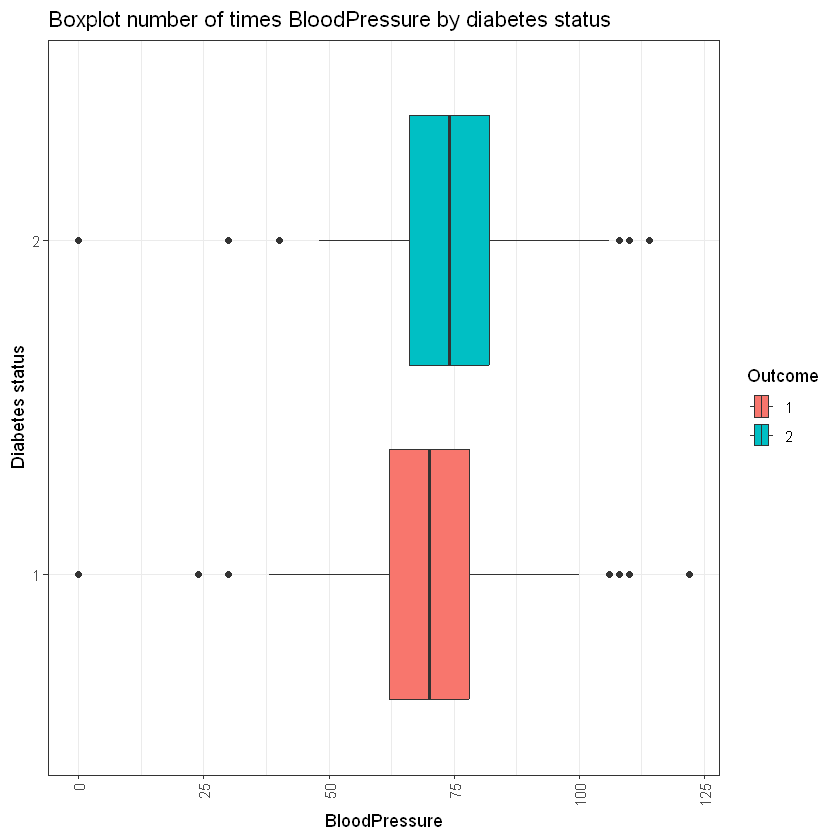

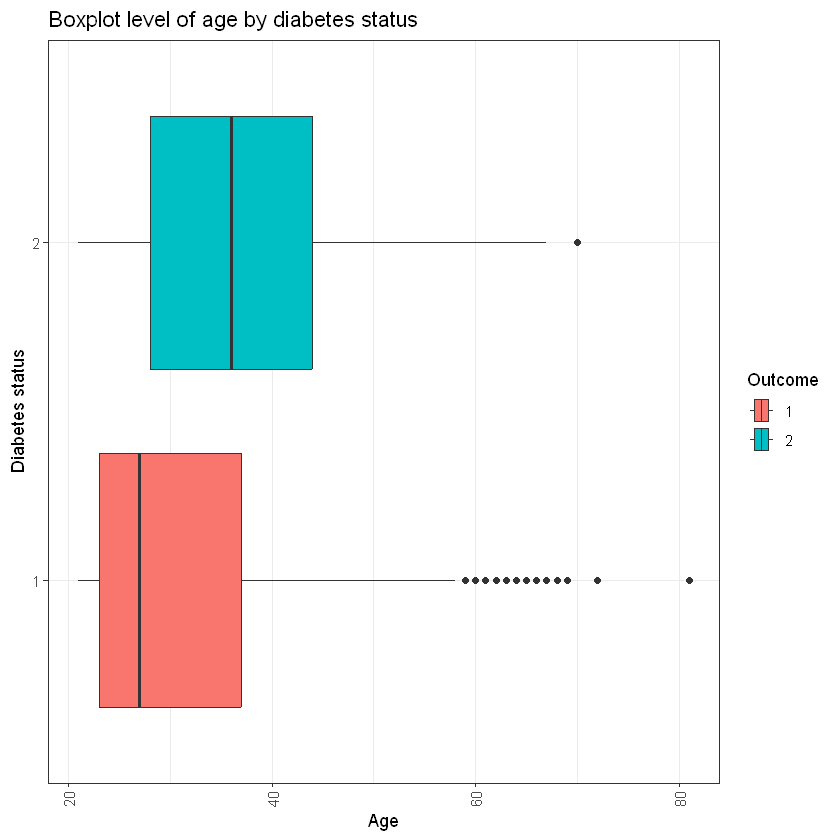

In [9]:
# construct boxplot
ggplot(df, aes(x=BloodPressure, y=Outcome, group=Outcome)) + 
  geom_boxplot(aes(fill=Outcome)) +
  labs(title="Boxplot number of times BloodPressure by diabetes status")+
  ylab(label="Diabetes status") + 
  xlab("BloodPressure")+
  theme_bw()+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

ggplot(df, aes(x=Age, y=Outcome, group=Outcome)) + 
  geom_boxplot(aes(fill=Outcome)) +
  labs(title="Boxplot level of age by diabetes status")+
  ylab(label="Diabetes status") + 
  xlab("Age")+
  theme_bw()+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

### Ex3

In [10]:
# prepare the data for modeling
set.seed(123456789)
dt = sort(sample(nrow(df), nrow(df)*0.7)) # 70% in train set
train<-df[dt,]
test<-df[-dt,]

In [11]:
# cross-validation strategy
ctrl <- trainControl(method = "repeatedcv",
                     number = 10,
                     repeats = 3)

In [12]:
# train the model using logistic regression
lm <- train(Outcome ~ ., method = "glm", 
            data = train, 
            trControl = ctrl, 
            preProcess = c("center"))
            
lm # to obtain summary of the model
varImp(lm) # to see most important parameters

Generalized Linear Model 

537 samples
  8 predictor
  2 classes: '1', '2' 

Pre-processing: centered (8) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 483, 484, 484, 483, 484, 483, ... 
Resampling results:

  Accuracy   Kappa    
  0.7411473  0.4116903


glm variable importance

                         Overall
Glucose                  100.000
BMI                       77.506
BloodPressure             36.967
Pregnancies               36.901
DiabetesPedigreeFunction  19.006
Age                       15.340
Insulin                    7.595
SkinThickness              0.000

k-Nearest Neighbors 

537 samples
  8 predictor
  2 classes: '1', '2' 

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 484, 484, 484, 482, 483, 483, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.7162899  0.3641858
   7  0.7163145  0.3614373
   9  0.7162796  0.3612918
  11  0.7162916  0.3491685
  13  0.7249918  0.3688000
  15  0.7355094  0.3906797
  17  0.7262268  0.3654250
  19  0.7262506  0.3623023
  21  0.7274618  0.3610023
  23  0.7231874  0.3464862

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 15.

ROC curve variable importance

                         Importance
Glucose                    100.0000
BMI                         67.7046
Age                         60.4974
DiabetesPedigreeFunction    29.9513
Pregnancies                 29.5315
BloodPressure               11.8730
SkinThickness                0.3308
Insulin                      0.0000

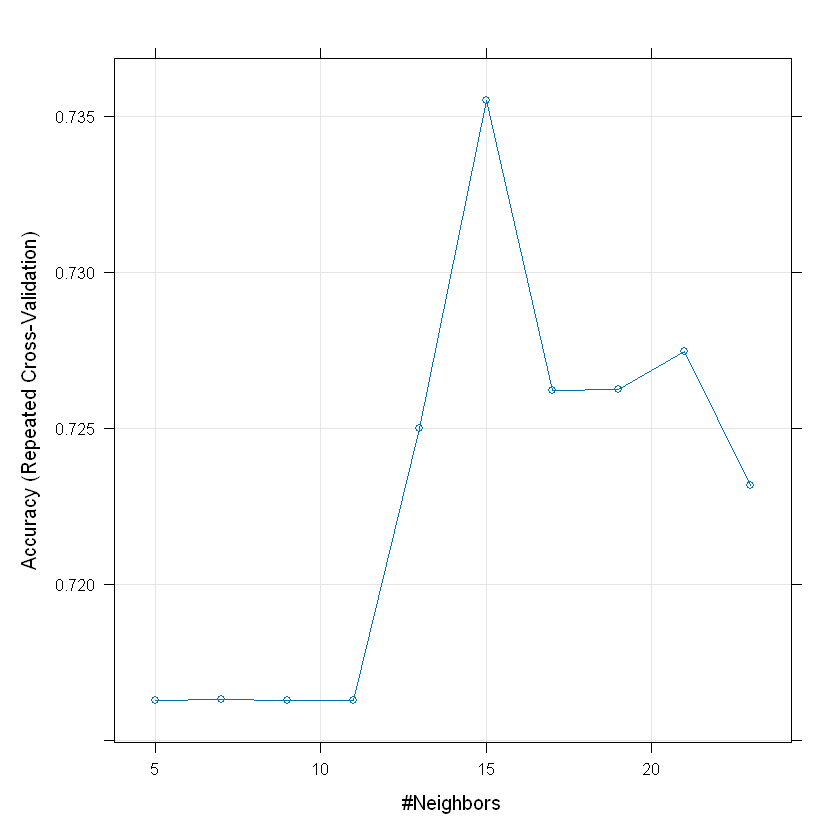

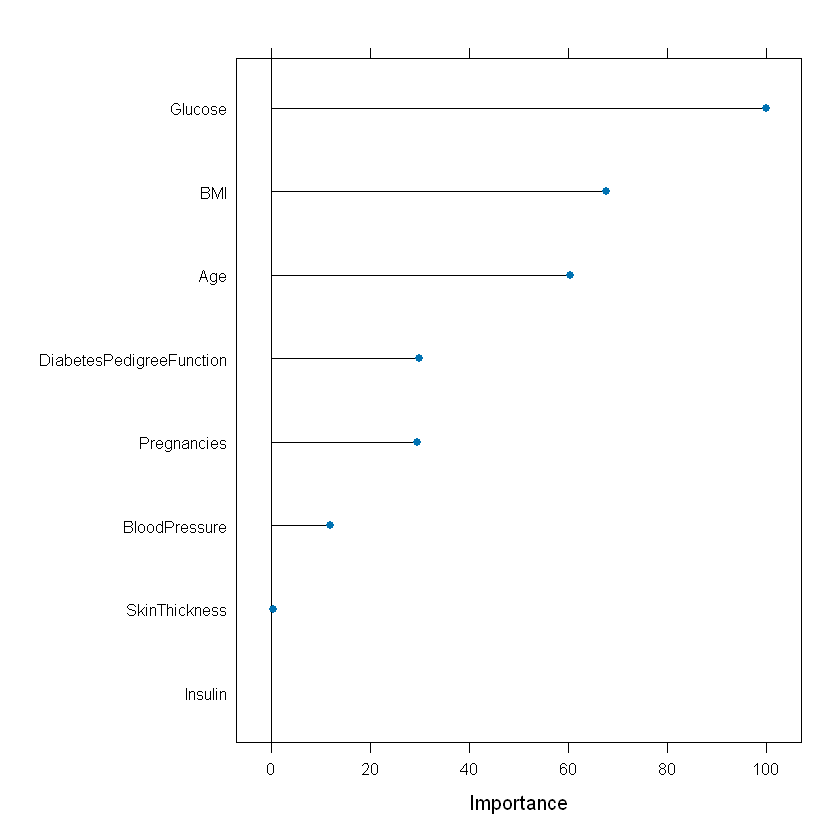

In [13]:
# train the model using K-Nearest Neighbors
knn <- train(Outcome ~ ., method = "knn", 
             data = train, 
             trControl = ctrl, 
             preProcess = c("center", "scale"),
             tuneLength = 10)
knn # to obtain summary of the model
varImp(knn) # to see most important parameters
plot(knn)
plot(varImp(knn)) # to plot most important parameters

glmnet 

537 samples
  8 predictor
  2 classes: '1', '2' 

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 483, 484, 483, 484, 483, 484, ... 
Resampling results across tuning parameters:

  lambda       Accuracy   Kappa    
  0.001000000  0.7493010  0.4309022
  0.003020408  0.7505127  0.4328372
  0.005040816  0.7505243  0.4316186
  0.007061224  0.7492898  0.4282043
  0.009081633  0.7480319  0.4254330
  0.011102041  0.7480431  0.4249458
  0.013122449  0.7455848  0.4185947
  0.015142857  0.7431152  0.4124109
  0.017163265  0.7412746  0.4071117
  0.019183673  0.7418923  0.4077112
  0.021204082  0.7425096  0.4079657
  0.023224490  0.7393994  0.3982048
  0.025244898  0.7375243  0.3932226
  0.027265306  0.7394111  0.3966306
  0.029285714  0.7400517  0.3964155
  0.031306122  0.7406340  0.3960382
  0.033326531  0.7387589  0.3904018
  0.035346939  0.7356724  0.3815250
  0.037367347  0.7338089  0.3763318
  0.039387755  0

glmnet variable importance

                         Overall
Glucose                  100.000
BMI                       74.039
Pregnancies               33.986
BloodPressure             29.432
Age                       15.199
DiabetesPedigreeFunction  14.665
Insulin                    4.736
SkinThickness              0.000

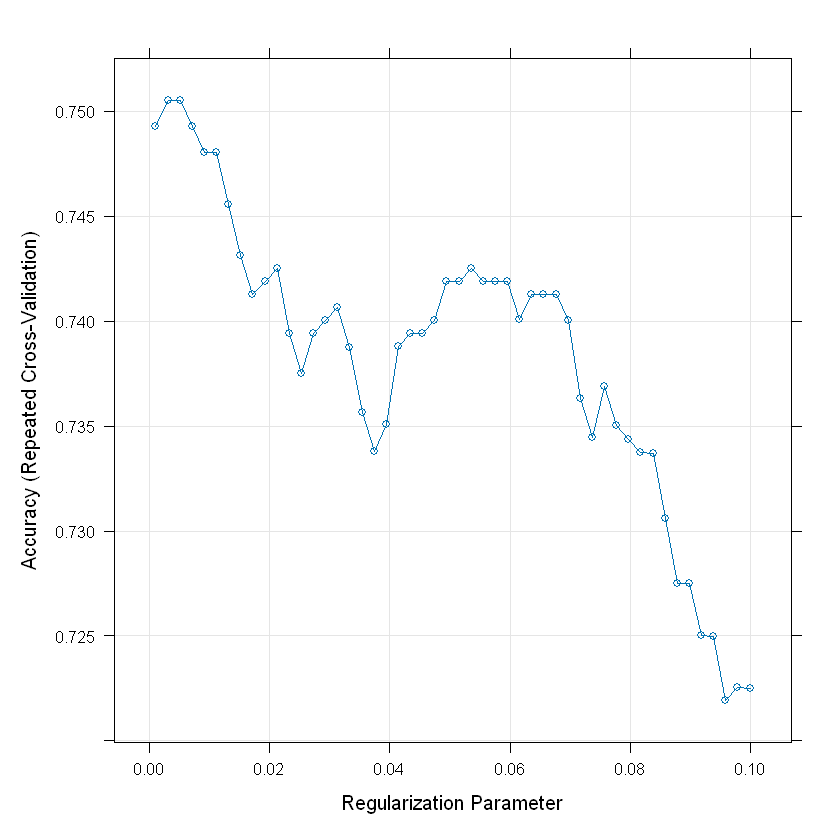

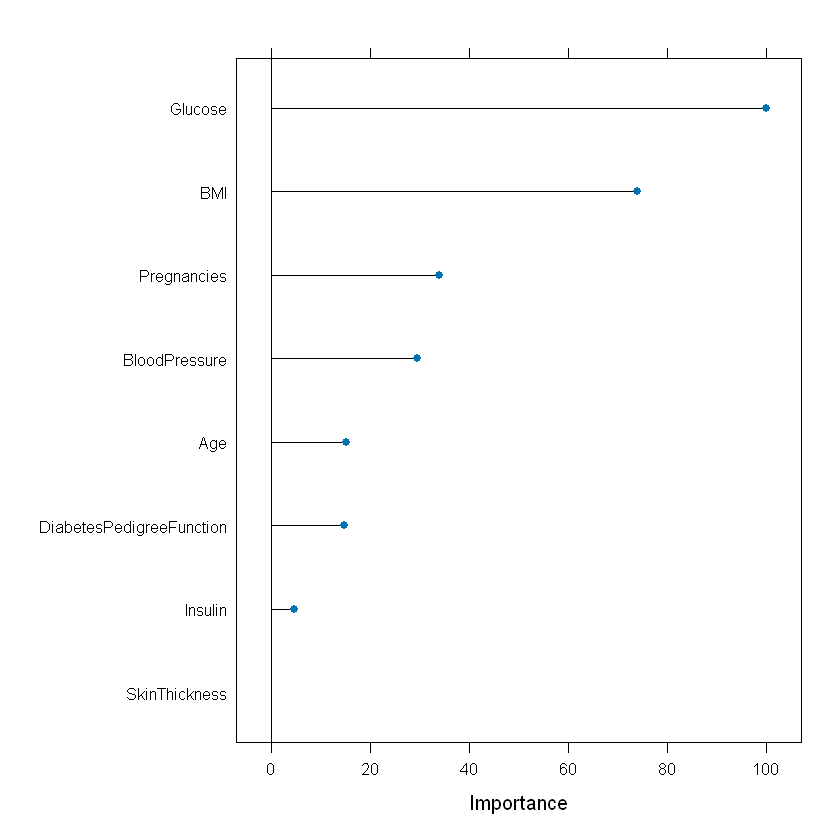

In [14]:
# train the model using LASSO regression
lasso <- train(Outcome ~ ., method = "glmnet", 
                data = train, 
                trControl = ctrl, 
                family = "binomial",
                preProcess = c("center", "scale"),
                tuneGrid = expand.grid(alpha = 1, lambda = seq(0.001, 0.1, length = 50)))
lasso # to obtain summary of the model
plot(lasso)
varImp(lasso) # to see most important parameters
plot(varImp(lasso)) # to plot most important parameters

In [15]:
# check performance on test set
# For LM:
print("LM performance")
pred_lm <- predict(lm, newdata = test)
confusionMatrix(pred_lm, test$Outcome)

# For KNN
print("KNN performance")
pred_knn <- predict(knn, newdata = test)
confusionMatrix(pred_knn, test$Outcome)

# For LASSO
print("LASSO performance")
pred_lasso <- predict(lasso, newdata = test)
confusionMatrix(pred_lasso, test$Outcome)

[1] "LM performance"


Confusion Matrix and Statistics

          Reference
Prediction   1   2
         1 140  22
         2  18  51
                                          
               Accuracy : 0.8268          
                 95% CI : (0.7718, 0.8733)
    No Information Rate : 0.684           
    P-Value [Acc > NIR] : 0.0000006445    
                                          
                  Kappa : 0.5935          
                                          
 Mcnemar's Test P-Value : 0.6353          
                                          
            Sensitivity : 0.8861          
            Specificity : 0.6986          
         Pos Pred Value : 0.8642          
         Neg Pred Value : 0.7391          
             Prevalence : 0.6840          
         Detection Rate : 0.6061          
   Detection Prevalence : 0.7013          
      Balanced Accuracy : 0.7924          
                                          
       'Positive' Class : 1               
                              

[1] "KNN performance"


Confusion Matrix and Statistics

          Reference
Prediction   1   2
         1 136  29
         2  22  44
                                         
               Accuracy : 0.7792         
                 95% CI : (0.7201, 0.831)
    No Information Rate : 0.684          
    P-Value [Acc > NIR] : 0.0008711      
                                         
                  Kappa : 0.4758         
                                         
 Mcnemar's Test P-Value : 0.4008142      
                                         
            Sensitivity : 0.8608         
            Specificity : 0.6027         
         Pos Pred Value : 0.8242         
         Neg Pred Value : 0.6667         
             Prevalence : 0.6840         
         Detection Rate : 0.5887         
   Detection Prevalence : 0.7143         
      Balanced Accuracy : 0.7317         
                                         
       'Positive' Class : 1              
                                         

[1] "LASSO performance"


Confusion Matrix and Statistics

          Reference
Prediction   1   2
         1 140  22
         2  18  51
                                          
               Accuracy : 0.8268          
                 95% CI : (0.7718, 0.8733)
    No Information Rate : 0.684           
    P-Value [Acc > NIR] : 0.0000006445    
                                          
                  Kappa : 0.5935          
                                          
 Mcnemar's Test P-Value : 0.6353          
                                          
            Sensitivity : 0.8861          
            Specificity : 0.6986          
         Pos Pred Value : 0.8642          
         Neg Pred Value : 0.7391          
             Prevalence : 0.6840          
         Detection Rate : 0.6061          
   Detection Prevalence : 0.7013          
      Balanced Accuracy : 0.7924          
                                          
       'Positive' Class : 1               
                              


Call:
summary.resamples(object = results)

Models: lm, knn, lasso 
Number of resamples: 30 

Accuracy 
           Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lm    0.6296296 0.7169811 0.7358491 0.7411473 0.7581237 0.8703704    0
knn   0.6415094 0.7037037 0.7407407 0.7355094 0.7700035 0.8888889    0
lasso 0.6666667 0.7222222 0.7547170 0.7505243 0.7777778 0.8301887    0

Kappa 
           Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lm    0.2058824 0.3577886 0.4028702 0.4116903 0.4502561 0.7004754    0
knn   0.1725555 0.3316024 0.4075235 0.3906797 0.4419117 0.7440758    0
lasso 0.2032787 0.3794435 0.4389857 0.4316186 0.4911602 0.6174820    0


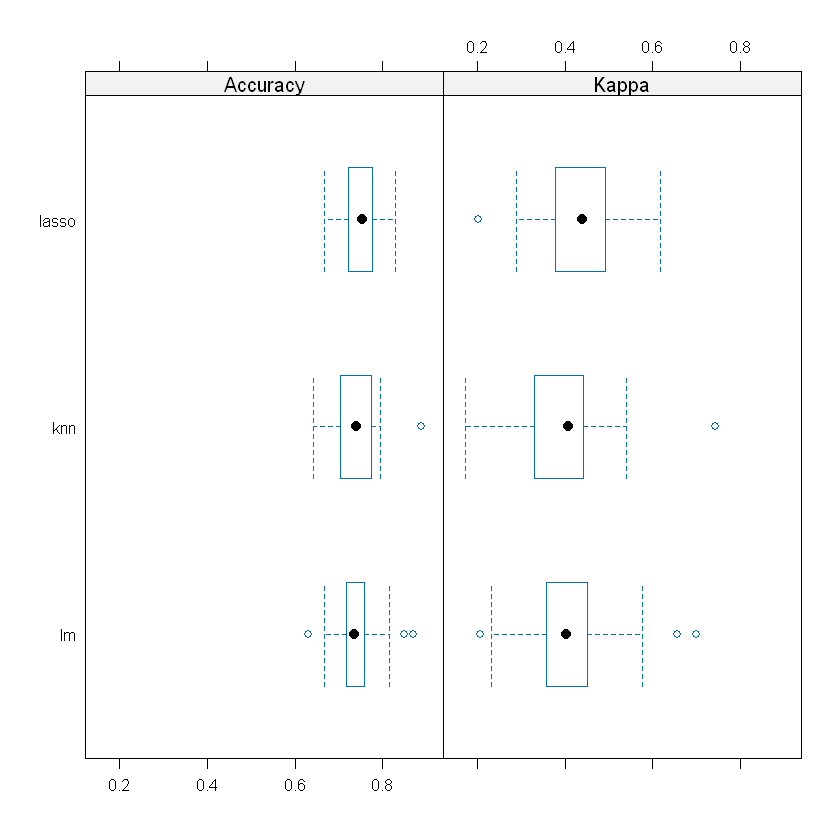

In [16]:
# compare the models
results <- resamples(list(lm = lm, knn = knn, lasso = lasso))
summary(results)
bwplot(results) # boxplot of the results


In [18]:
#install.packages('shapviz')
#install.packages('ggplot2')
#install.packages('xgboost')

library(shapviz)
library(ggplot2)
library(xgboost)

# show shap for the LASSO model
shap_lasso <- shapviz(lasso, X = train, type = "shap", 
                      ncol = 3, 
                      title = "SHAP values for LASSO model")
plot(shap_lasso) +
  labs(title = "SHAP values for LASSO model") +
  theme_minimal()


ERROR: Error in shapviz.default(lasso, X = train, type = "shap", ncol = 3, title = "SHAP values for LASSO model"): No default method available.
